## Problem Statement

To estimate the delivery time of Porter using Neural Networks

## Importing libraries

In [1]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for handling datetime operations
from datetime import datetime

# Importing libraries for preprocessing and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Importing libraries for splitting data
from sklearn.model_selection import train_test_split

# Importing libraries for neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Importing libraries for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Setting up visualization styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')


### Importing Porter data

In [2]:
df=pd.read_csv('porter_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


### Printing basic info of the features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

### Converting relevant columns to pandas Datetime

In [4]:
# Converting 'created_at' and 'actual_delivery_time' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

### Creating target column(Time taken)

In [13]:
# Create a new column named 'time_taken' to store the difference in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at'])

In [14]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50


In [15]:
# Extracting the total minutes from the 'time_taken' column
df['time_taken_minutes'] = df['time_taken'].dt.total_seconds() // 60


In [16]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_minutes
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.0


### Feature Engineering and Data Preprocessing

#### Creating hour and day of week column

In [17]:
# Extracting hour and day of the week from 'created_at'
df['order_hour'] = df['created_at'].dt.hour
df['order_day_of_week'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

In [18]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_minutes,order_hour,order_day_of_week
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.0,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.0,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.0,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.0,2,6


### Dropping columns that arent useful anymore

In [19]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_id                  197428 non-null  object 
 2   store_primary_category    192668 non-null  object 
 3   order_protocol            196433 non-null  float64
 4   total_items               197428 non-null  int64  
 5   subtotal                  197428 non-null  int64  
 6   num_distinct_items        197428 non-null  int64  
 7   min_item_price            197428 non-null  int64  
 8   max_item_price            197428 non-null  int64  
 9   total_onshift_partners    181166 non-null  float64
 10  total_busy_partners       181166 non-null  float64
 11  total_outstanding_orders  181166 non-null  float64
 12  time_taken_minutes        197421 non-null  float64
 13  order_hour                197428 non-null  i

### Handling Null values

In [20]:
df.isna().sum()

market_id                     987
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time_taken_minutes              7
order_hour                      0
order_day_of_week               0
dtype: int64

In [25]:
# Finding the number of unique values in each column
unique_values = {column: df[column].nunique() for column in df.columns}

# Displaying the unique values count for each column
for column, unique_count in unique_values.items():
    print(f"{column}: {unique_count}")


market_id: 6
store_id: 6743
store_primary_category: 74
order_protocol: 7
total_items: 57
subtotal: 8368
num_distinct_items: 20
min_item_price: 2312
max_item_price: 2652
total_onshift_partners: 172
total_busy_partners: 159
total_outstanding_orders: 281
time_taken_minutes: 274
order_hour: 19
order_day_of_week: 7


In [71]:
df1=df.dropna()

In [93]:
df[df["store_id"]=="252a3dbaeb32e7690242ad3b556e626b"]

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week
52018,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,4,5950,3,660,1890,NaN,NaN,NaN,40.0,2,6
52019,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,1,2735,1,2575,2575,NaN,NaN,NaN,24.0,2,2
52020,2.0,252a3dbaeb32e7690242ad3b556e626b,burger,3.0,2,2515,2,545,1890,NaN,NaN,NaN,94.0,2,5
52021,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,2,3915,2,1890,1945,NaN,NaN,NaN,44.0,2,5
52022,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,1,2064,1,1345,1345,NaN,NaN,NaN,43.0,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63432,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,1,1828,1,1446,1578,NaN,NaN,NaN,36.0,1,6
63433,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,3,4055,2,1115,1430,NaN,NaN,NaN,63.0,2,5
63434,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,1,1510,1,1430,1430,NaN,NaN,NaN,43.0,1,6
63435,6.0,252a3dbaeb32e7690242ad3b556e626b,american,5.0,1,1890,1,1890,1890,NaN,NaN,NaN,27.0,4,3


### Checking whether mean or median is the right choice for Null imputation

In [100]:
df.groupby("market_id")["total_onshift_partners"].mean()

market_id
1.0    24.208854
2.0    62.590695
3.0    18.847580
4.0    60.464482
5.0    23.911045
6.0    44.929771
Name: total_onshift_partners, dtype: float64

In [101]:
df.groupby("market_id")["total_onshift_partners"].median()

market_id
1.0    19.0
2.0    55.0
3.0    15.0
4.0    60.0
5.0    20.0
6.0    36.0
Name: total_onshift_partners, dtype: float64

In [103]:
df.groupby("order_hour")["total_onshift_partners"].mean()

order_hour
0     27.933751
1     54.325601
2     67.995169
3     64.205588
4     44.996112
5     23.589613
6     13.421094
7     10.777778
8      0.000000
14     0.550000
15     2.141473
16     4.965949
17     7.757729
18    15.092275
19    32.199487
20    37.353387
21    30.325540
22    22.749043
23    20.274580
Name: total_onshift_partners, dtype: float64

In [105]:
df.groupby("order_day_of_week")["total_onshift_partners"].mean()

order_day_of_week
0    42.084044
1    37.333062
2    40.067352
3    43.746503
4    48.602855
5    52.111917
6    45.943654
Name: total_onshift_partners, dtype: float64

In [112]:
df.groupby(["market_id","order_hour"])["total_onshift_partners"].mean()

market_id  order_hour
1.0        0             14.437811
           1             26.014145
           2             36.809734
           3             37.072227
           4             27.385254
                           ...    
6.0        19            30.744186
           20            40.627907
           21            31.200000
           22            23.806452
           23            18.000000
Name: total_onshift_partners, Length: 106, dtype: float64

### Mean Imputation

In [113]:
# List of columns to impute
columns_to_impute = ['total_outstanding_orders', 'total_busy_partners', 'total_onshift_partners']

# Group by 'market_id' and 'order_hour'
grouped = df.groupby(['market_id', 'order_hour'])

# Impute missing values
for column in columns_to_impute:
    # Calculate the mean for each group and transform to align with the original DataFrame
    df[column] = grouped[column].transform(lambda x: x.fillna(x.mean()))

In [114]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6


In [115]:
df.isna().sum()

market_id                    987
store_id                       0
store_primary_category      4760
order_protocol               995
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners       989
total_busy_partners          989
total_outstanding_orders     989
time_taken_minutes             7
order_hour                     0
order_day_of_week              0
dtype: int64

### Dropping null rows

In [117]:
df[df["total_onshift_partners"].isnull()].dropna(inplace=True)

In [118]:
df.isna().sum()

market_id                    987
store_id                       0
store_primary_category      4760
order_protocol               995
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners       989
total_busy_partners          989
total_outstanding_orders     989
time_taken_minutes             7
order_hour                     0
order_day_of_week              0
dtype: int64

In [119]:
df= df[~df['total_onshift_partners'].isnull()]


In [121]:
df.isna().sum()

market_id                      0
store_id                       0
store_primary_category      4268
order_protocol               508
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
time_taken_minutes             7
order_hour                     0
order_day_of_week              0
dtype: int64

In [122]:
df= df[~df['order_protocol'].isnull()]

In [123]:
df.isna().sum()

market_id                      0
store_id                       0
store_primary_category      4005
order_protocol                 0
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
time_taken_minutes             7
order_hour                     0
order_day_of_week              0
dtype: int64

In [124]:
df= df[~df['time_taken_minutes'].isnull()]

In [125]:
df.isna().sum()

market_id                      0
store_id                       0
store_primary_category      4005
order_protocol                 0
total_items                    0
subtotal                       0
num_distinct_items             0
min_item_price                 0
max_item_price                 0
total_onshift_partners         0
total_busy_partners            0
total_outstanding_orders       0
time_taken_minutes             0
order_hour                     0
order_day_of_week              0
dtype: int64

In [126]:
df[df["store_primary_category"].isna()]

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6
5,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,38.0,20,2
6,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,26.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197208,1.0,77c493ec14246d748db3ee8fce0092db,NaN,1.0,7,5100,6,500,1700,22.0,24.0,44.0,151.0,3,3
197209,1.0,77c493ec14246d748db3ee8fce0092db,NaN,1.0,7,7200,6,700,1500,20.0,20.0,22.0,47.0,20,3
197210,1.0,77c493ec14246d748db3ee8fce0092db,NaN,1.0,3,2800,3,700,1400,24.0,22.0,25.0,63.0,2,6
197211,1.0,77c493ec14246d748db3ee8fce0092db,NaN,1.0,2,1400,2,700,700,22.0,22.0,24.0,33.0,1,1


In [128]:
df[df["store_id"]=='f0ade77b43923b38237db569b016ba25']

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6
5,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,38.0,20,2
6,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,26.0,2,5
7,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,32.0,3,3
8,2.0,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.0,0,0
9,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,53.0,1,2
10,3.0,f0ade77b43923b38237db569b016ba25,NaN,4.0,4,4300,4,1200,1500,1.0,1.0,1.0,46.0,19,0


In [129]:
df[df["store_primary_category"].isna()]["store_id"].nunique()

632

In [131]:
df2=df[df["store_primary_category"].isna()]["store_id"].unique()

### Imputing store_primary_category by mode

In [138]:
# Function to impute missing values by mode, handling ties randomly
def impute_by_mode(df, column):
    # Get the mode(s)
    modes = df[column].mode()
    
    if len(modes) > 1:
        # If there are ties, choose one randomly with equal probability
        chosen_mode = np.random.choice(modes)
    else:
        # If no tie, use the single mode
        chosen_mode = modes[0]
    
    # Impute missing values with the chosen mode
    df[column].fillna(chosen_mode, inplace=True)

# List of columns to impute
columns_to_impute = ['store_primary_category']

# Apply the function to each column
for column in columns_to_impute:
    impute_by_mode(df, column)

In [139]:
df.isna().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time_taken_minutes          0
order_hour                  0
order_day_of_week           0
dtype: int64

In [140]:
df.shape

(195924, 15)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195924 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 195924 non-null  float64
 1   store_id                  195924 non-null  object 
 2   store_primary_category    195924 non-null  object 
 3   order_protocol            195924 non-null  float64
 4   total_items               195924 non-null  int64  
 5   subtotal                  195924 non-null  int64  
 6   num_distinct_items        195924 non-null  int64  
 7   min_item_price            195924 non-null  int64  
 8   max_item_price            195924 non-null  int64  
 9   total_onshift_partners    195924 non-null  float64
 10  total_busy_partners       195924 non-null  float64
 11  total_outstanding_orders  195924 non-null  float64
 12  time_taken_minutes        195924 non-null  float64
 13  order_hour                195924 non-null  int32 

In [143]:
store_name_counts = df['store_id'].value_counts()
df['store_name_enc'] = df['store_id'].map(store_name_counts)

In [148]:
df = df.drop('store_name_enc', axis=1)

In [149]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1
2,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3
3,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1
4,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6


### Using Label Encoding for store name

In [150]:
from sklearn.preprocessing import LabelEncoder

In [152]:
label_encoder = LabelEncoder()
df['store_name_encoded'] = label_encoder.fit_transform(df['store_id'])

In [153]:
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week,store_name_encoded
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4,5911
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1,6343
2,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3,6343
3,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1,6343
4,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6,6343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1,4512
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4,4512
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5,4512
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6,5334


In [154]:
df=df.drop("store_id",axis=1)

In [155]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week,store_name_encoded
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4,5911
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1,6343
2,3.0,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3,6343
3,3.0,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1,6343
4,3.0,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6,6343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1,4512
197424,1.0,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4,4512
197425,1.0,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5,4512
197426,1.0,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6,5334


In [156]:
duplicates = df.duplicated()

# Print the original DataFrame with a marker for duplicates
print(df.loc[duplicates])

        market_id store_primary_category  order_protocol  total_items  \
139263        6.0                 indian             3.0            2   
166281        6.0                   cafe             4.0            1   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
139263      1650                   1             825             825   
166281       350                   1             350             350   

        total_onshift_partners  total_busy_partners  total_outstanding_orders  \
139263               39.813559             40.40678                 51.135593   
166281               39.813559             40.40678                 51.135593   

        time_taken_minutes  order_hour  order_day_of_week  store_name_encoded  
139263                24.0           4                  1                2637  
166281                39.0           4                  4                1501  


In [159]:
df=df.drop_duplicates()

In [160]:
df

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week,store_name_encoded
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4,5911
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1,6343
2,3.0,american,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3,6343
3,3.0,american,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1,6343
4,3.0,american,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6,6343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1,4512
197424,1.0,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4,4512
197425,1.0,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5,4512
197426,1.0,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6,5334


In [161]:
df.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time_taken_minutes          0
order_hour                  0
order_day_of_week           0
store_name_encoded          0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195922 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 195922 non-null  float64
 1   store_primary_category    195922 non-null  object 
 2   order_protocol            195922 non-null  float64
 3   total_items               195922 non-null  int64  
 4   subtotal                  195922 non-null  int64  
 5   num_distinct_items        195922 non-null  int64  
 6   min_item_price            195922 non-null  int64  
 7   max_item_price            195922 non-null  int64  
 8   total_onshift_partners    195922 non-null  float64
 9   total_busy_partners       195922 non-null  float64
 10  total_outstanding_orders  195922 non-null  float64
 11  time_taken_minutes        195922 non-null  float64
 12  order_hour                195922 non-null  int32  
 13  order_day_of_week         195922 non-null  int32 

### label Encoding store_primary_category

In [164]:
label_encoder = LabelEncoder()
df['store_primary_category_enc'] = label_encoder.fit_transform(df['store_primary_category'])

In [166]:
df=df.drop("store_primary_category",axis=1)

In [167]:
df

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken_minutes,order_hour,order_day_of_week,store_name_encoded,store_primary_category_enc
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.0,22,4,5911,4
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.0,21,1,6343,47
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.0,20,3,6343,4
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.0,21,1,6343,4
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.0,2,6,6343,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.0,0,1,4512,28
197424,1.0,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.0,0,4,4512,28
197425,1.0,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.0,4,5,4512,28
197426,1.0,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.0,18,6,5334,59


## Data Vizualisation

<Axes: >

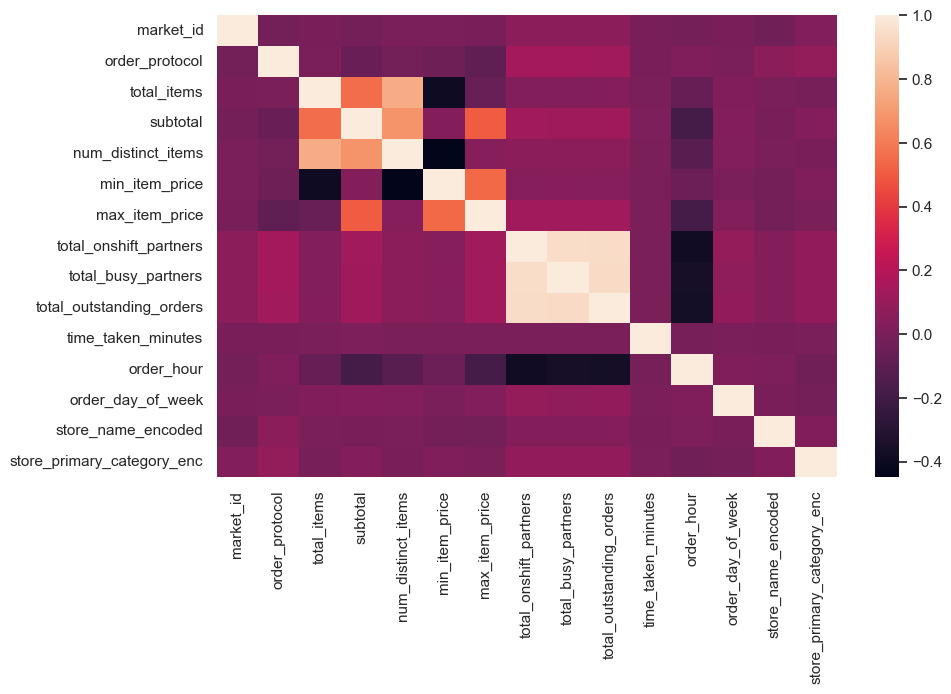

In [168]:
sns.heatmap(df.corr())

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195922 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   market_id                   195922 non-null  float64
 1   order_protocol              195922 non-null  float64
 2   total_items                 195922 non-null  int64  
 3   subtotal                    195922 non-null  int64  
 4   num_distinct_items          195922 non-null  int64  
 5   min_item_price              195922 non-null  int64  
 6   max_item_price              195922 non-null  int64  
 7   total_onshift_partners      195922 non-null  float64
 8   total_busy_partners         195922 non-null  float64
 9   total_outstanding_orders    195922 non-null  float64
 10  time_taken_minutes          195922 non-null  float64
 11  order_hour                  195922 non-null  int32  
 12  order_day_of_week           195922 non-null  int32  
 13  store_name_encoded 

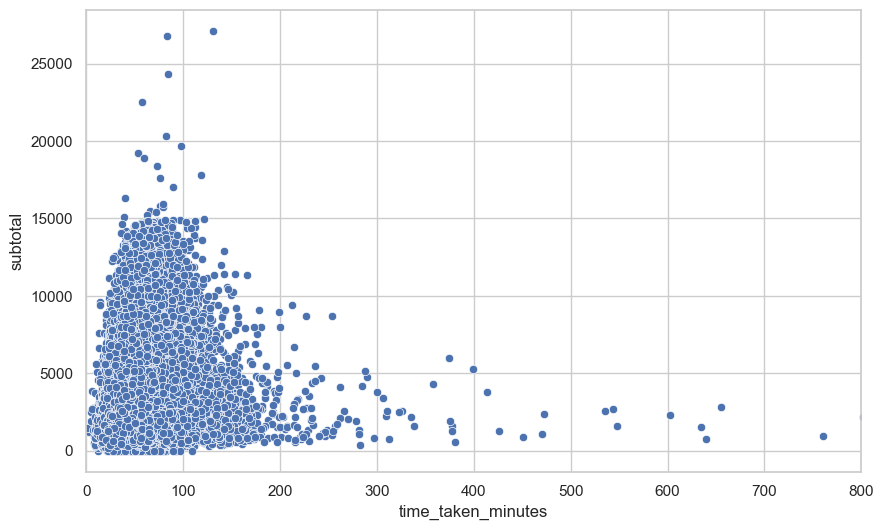

In [178]:
# Create the scatter plot
sns.scatterplot(x='time_taken_minutes', y='subtotal', data=df)

# Set the x-axis limit
plt.xlim(0, 800)

# Show the plot
plt.show()

<Axes: xlabel='total_items', ylabel='subtotal'>

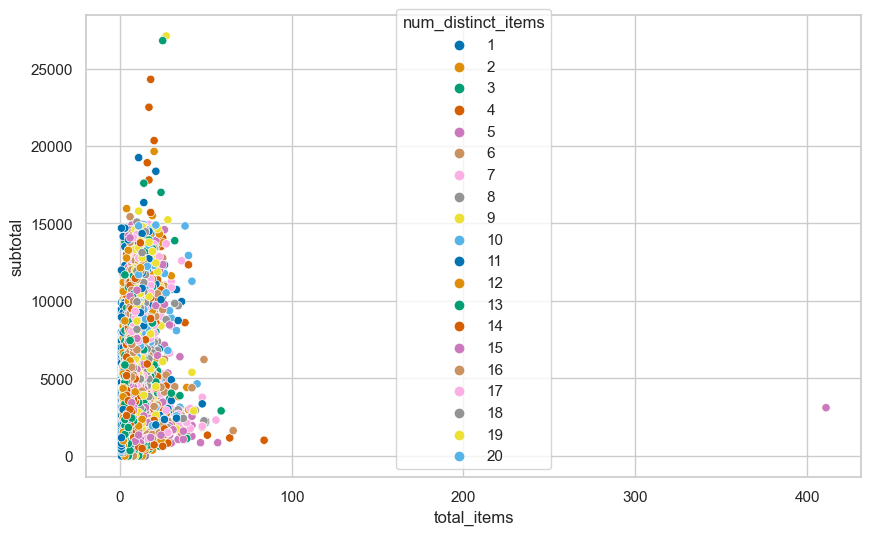

In [173]:
sns.scatterplot(x='total_items', y='subtotal', hue='num_distinct_items',palette='colorblind', data=df)

In [222]:
df3=df.copy()

In [223]:
df3.shape

(195922, 15)

In [225]:
df3=df3.drop("store_name_encoded",axis=1)

### Removing outliers using LOF

In [228]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1 = LocalOutlierFactor(contamination=0.05)
df3['lof_anomaly_score'] = model1.fit_predict(df3)


In [229]:
print("number of outliers : ",(len(df3.loc[(df3['lof_anomaly_score'] == -1)])))
df3=df3.loc[(df3['lof_anomaly_score'] == 1)]


number of outliers :  8817


In [230]:
df3.drop(['lof_anomaly_score'],axis=1,inplace=True)

<Axes: xlabel='time_taken_minutes', ylabel='subtotal'>

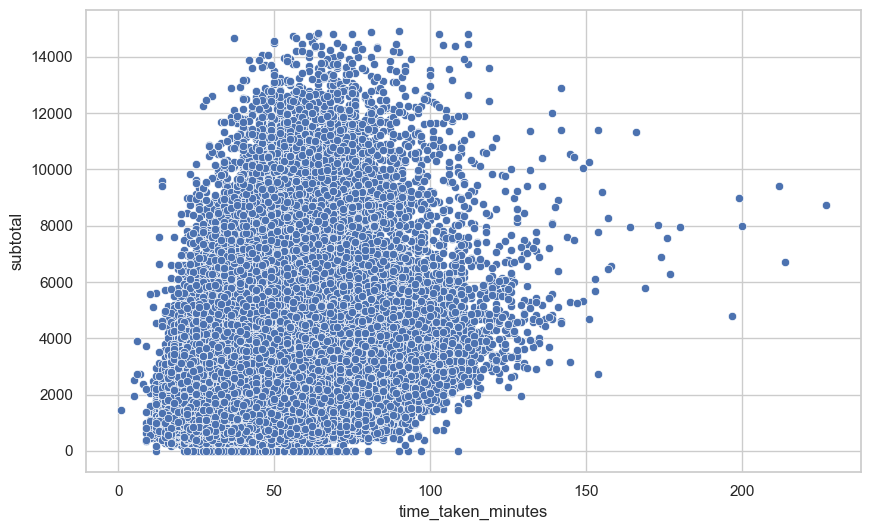

In [231]:
# Create the scatter plot
sns.scatterplot(x='time_taken_minutes', y='subtotal', data=df3)


### Making various plots from features

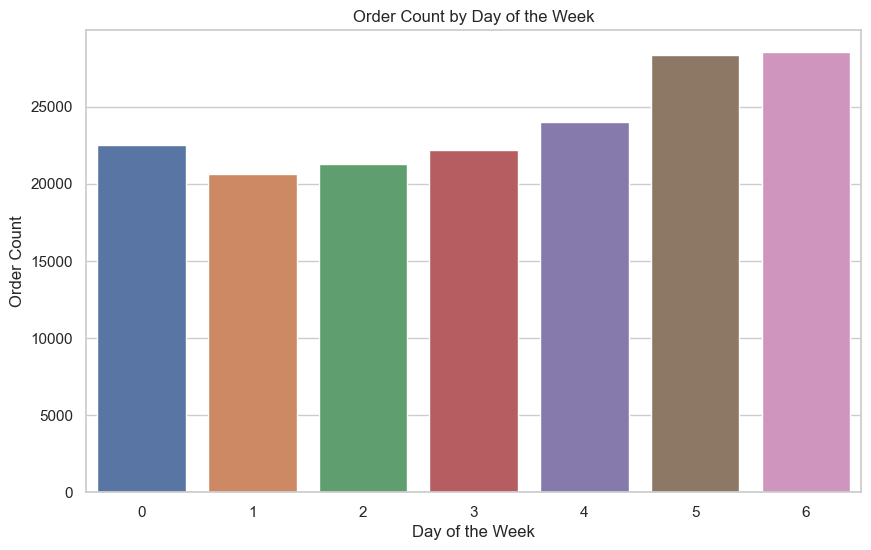

In [232]:
# Create a countplot for the 'order_day_of_week' column
sns.countplot(x='order_day_of_week', data=df3)

# Set the title and labels
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')

# Show the plot
plt.show()

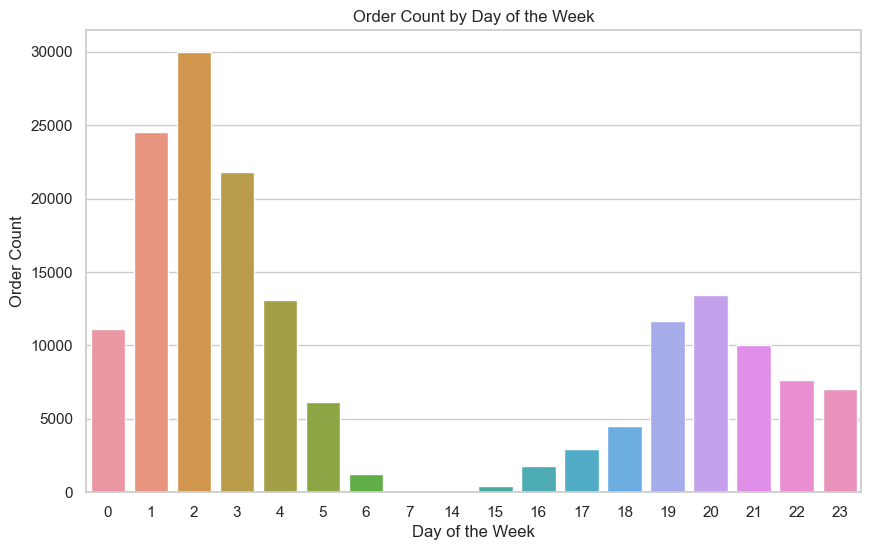

In [233]:
# Create a countplot for the 'order_day_of_week' column
sns.countplot(x='order_hour', data=df3)

# Set the title and labels
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')

# Show the plot
plt.show()

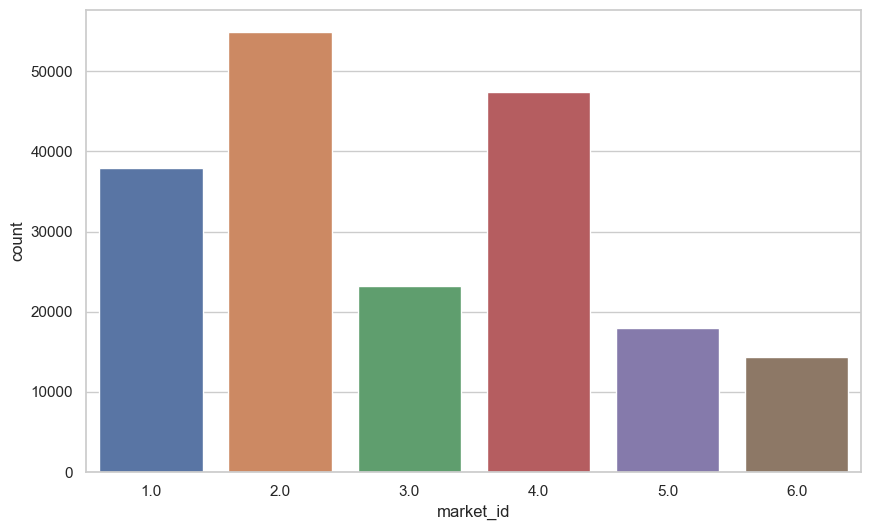

In [276]:
sns.countplot(x=df.market_id)
plt.show()

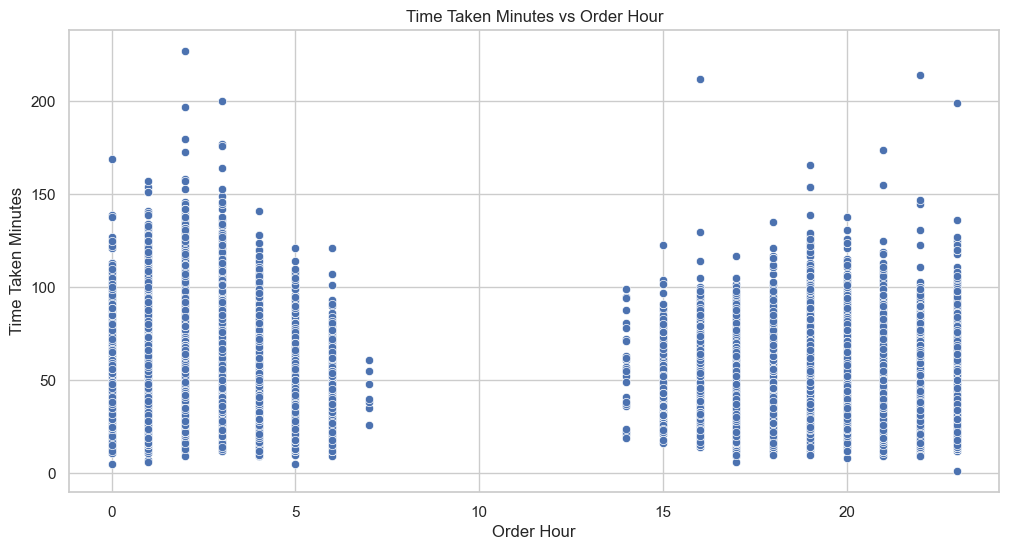

In [234]:
# Create a scatter plot for 'order_hour' vs 'time_taken_minutes'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='order_hour', y='time_taken_minutes', data=df3)

# Set the title and labels
plt.title('Time Taken Minutes vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken Minutes')

# Show the plot
plt.show()

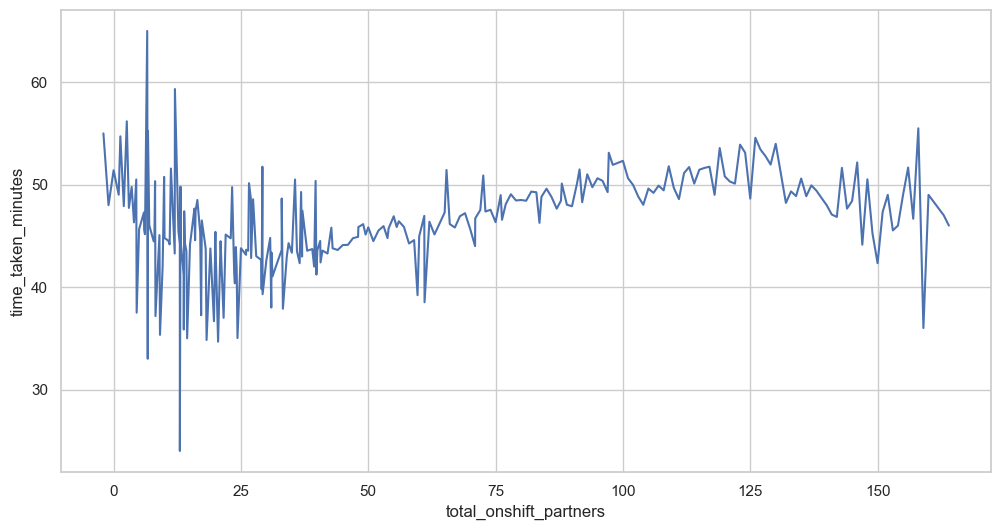

In [277]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_onshift_partners', y='time_taken_minutes', data=df3, ci=None)
plt.show()

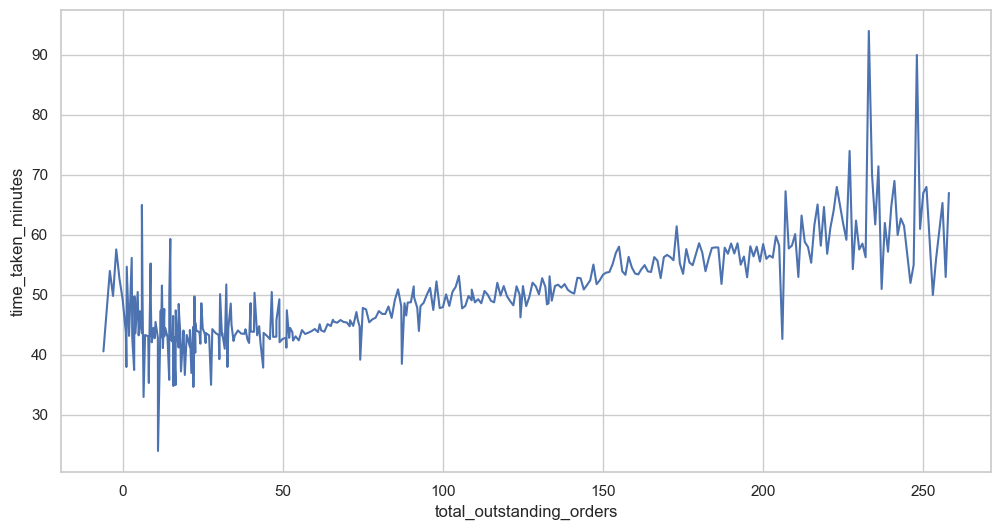

In [278]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_outstanding_orders', y='time_taken_minutes', data=df3, ci=None)
plt.show()

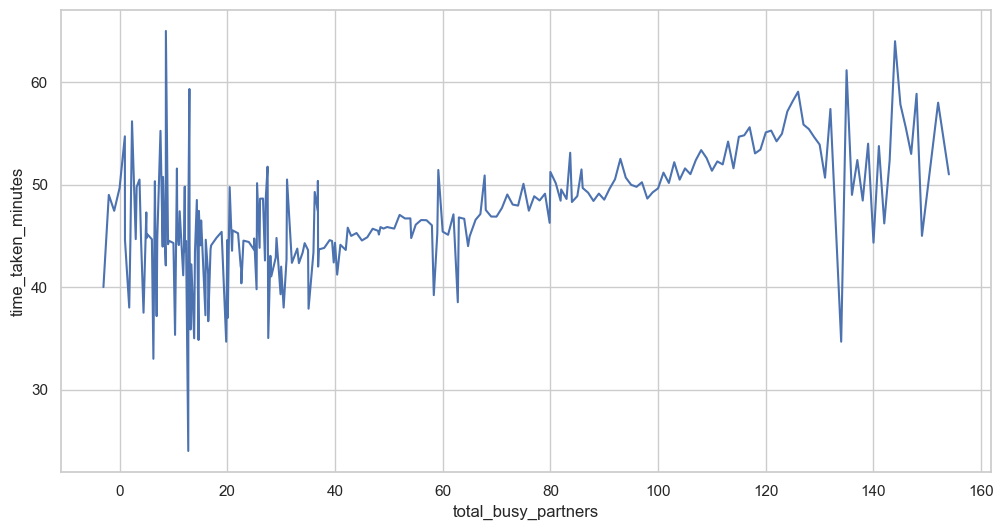

In [279]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='total_busy_partners', y='time_taken_minutes', data=df3, ci=None)
plt.show()

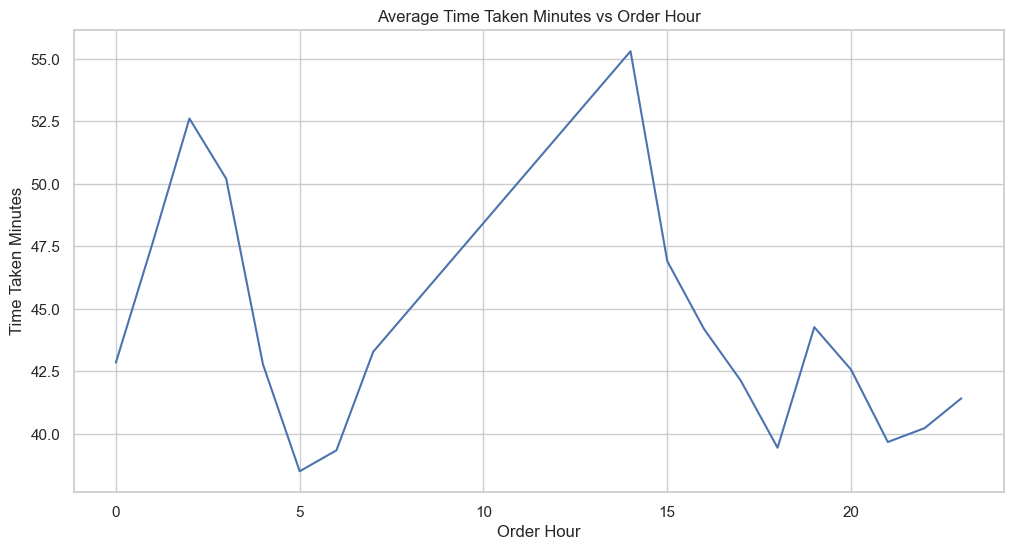

In [235]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour', y='time_taken_minutes', data=df3, ci=None)

# Set the title and labels
plt.title('Average Time Taken Minutes vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken Minutes')

# Show the plot
plt.show()

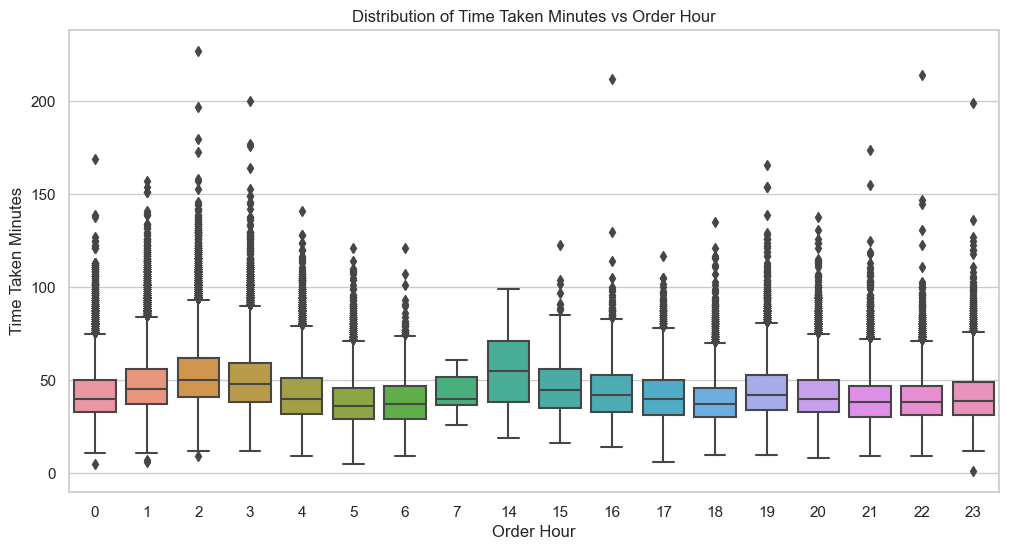

In [236]:
# Create a box plot for 'order_hour' vs 'time_taken_minutes'
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken_minutes', data=df3)

# Set the title and labels
plt.title('Distribution of Time Taken Minutes vs Order Hour')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken Minutes')

# Show the plot
plt.show()

In [237]:
y=df3['time_taken_minutes']
x = df3.drop(['time_taken_minutes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [267]:
x


,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day_of_week,store_primary_category_enc
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,22,4,4
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,21,1,47
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,20,3,4
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,21,1,4
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197422,1.0,4.0,7,2445,3,145,585,23.0,24.0,24.0,19,5,28
197423,1.0,4.0,3,1389,3,345,649,17.0,17.0,23.0,0,1,28
197424,1.0,4.0,6,3010,4,405,825,12.0,11.0,14.0,0,4,28
197425,1.0,4.0,5,1836,3,300,399,39.0,41.0,40.0,4,5,28


In [239]:
y

0         62.0
1         67.0
2         29.0
3         51.0
4         39.0
          ... 
197422    39.0
197423    65.0
197424    56.0
197425    50.0
197427    37.0
Name: time_taken_minutes, Length: 167512, dtype: float64

In [240]:
#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

### Creating baseline model RF to compare with Neural Networks


In [241]:
regressor = RandomForestRegressor()
 
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [242]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)
mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

mse :  189.7520443763879
rmse :  13.775051519917735
mae: 10.596033335678541


In [243]:
r2_score(y_test, prediction)

0.2674632758036619

In [210]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [211]:
print("mape : ",MAPE(y_test, prediction))

mape :  26.785473813844728


Text(0.5, 0, 'Random Forest Feature Importance')

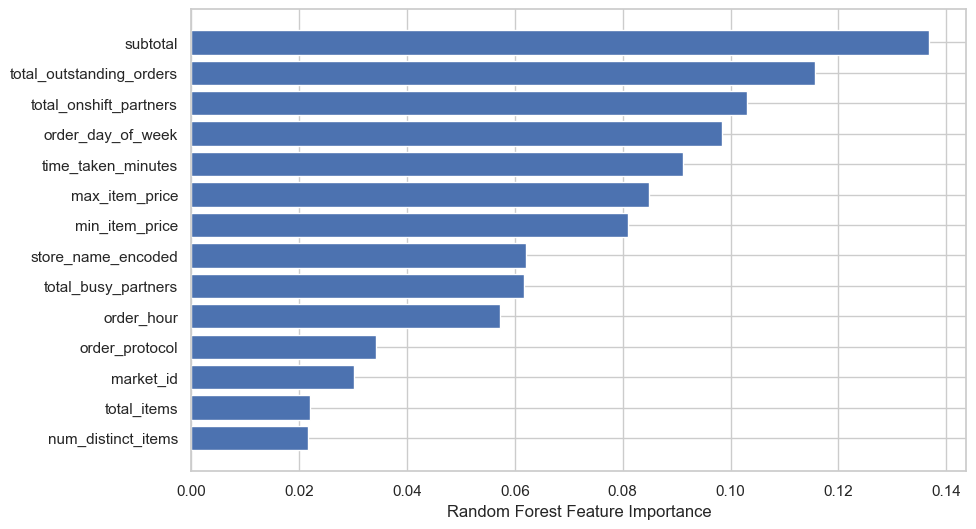

In [212]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df3.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Train-Test Splitting Standard Scaling

In [268]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

### Creating Neural Network Architecture

In [269]:
model = Sequential()
model.add(Dense(11,  kernel_initializer='normal'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

### Model Training

In [270]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 494.4725 - mae: 16.5599 - mse: 494.4740 - val_loss: 219.5136 - val_mae: 11.8986 - val_mse: 219.2648
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 208.4257 - mae: 11.1222 - mse: 208.4255 - val_loss: 202.5453 - val_mae: 11.0873 - val_mse: 202.2113
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 202.7528 - mae: 10.9684 - mse: 202.7528 - val_loss: 202.1935 - val_mae: 11.1603 - val_mse: 201.9666
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 200.8208 - mae: 10.8961 - mse: 200.8214 - val_loss: 199.8381 - val_mae: 10.7330 - val_mse: 199.5218
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 197.0804 - mae: 10.7782 - mse: 197.0802 - val_loss: 201.0477 - val_mae: 10.6818 - val_mse: 200.7270
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 198.9585 - mae: 10.8274 - mse: 198.9591 - val_loss: 197.6735 - val_mae: 10.6539 - val_mse: 197.4005
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━

### Comparing losses with epochs


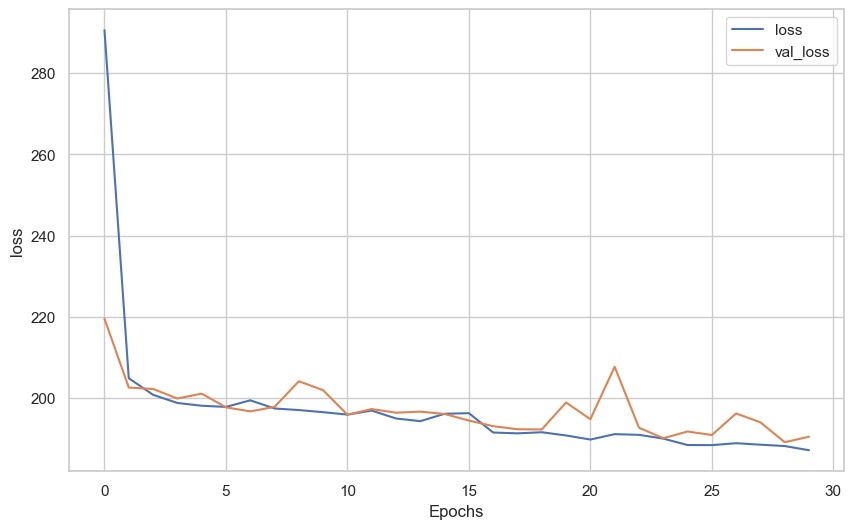

In [271]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

In [272]:
z= model.predict(X_test)

1047/1047 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [273]:
r2_score(y_test, z)

0.25638306639426456

### MAE RMSE MSE values for Neural Networks

In [275]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)

mse :  192.6221972548777
rmse :  13.878839910269075
mae :  10.842252765538582
